<a href="https://colab.research.google.com/github/VittorGuih/assessment-incidium-imdb-rating/blob/master/desafioIncidium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DESAFIO INCIDIUM

---

ANÁLISE EXPLORATÓRIA DOS DADOS

---

PASSOS:

- IMPORTAR AS BIBLIOTECAS
- IMPORTAR BASE DE DADOS
- VISUALIZAR A BASE
- DESCOBRIR TAMANHO DA BASE
- VERIFICAR VALORES NULOS E TIPOS
- VEIRIFICAR TIPOS DE DADOS
- VERIFICAR EXISTÊNCIA DE DADOS NULOS
- ENTENDER MELHOR OS VALORES NULOS
- ANALISAR AS INFORMAÇÕES ESTATÍSTICAS
- ENTENDER MELHOR ESSAS INFORMAÇÕES
- ENTENDER QUEM SÃO OS *OUTLIERS*


In [157]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pickle

In [158]:
# carregando arquivos csv
df_original = pd.read_csv('/content/desafio_indicium_imdb.csv')

### AVALIANDO O CONJUNTO DE DADOS DE FORMA MACRO

In [159]:
# verificar primeiras linhas do DataFrame

df_original.head()

df_original.tail()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
994,995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
998,999,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,A man in London tries to help a counter-espion...,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


In [160]:
# verificar dimensões do arquivo

df_original.shape


(999, 16)

In [161]:
# verificar informações do arquivo

df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


### Verifica se existe valores nulos nos dados

In [162]:
df_original.isnull().sum()

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

### Verifica os valores unicos de cada coluna

In [163]:
valores_unicos = []
for i in df_original.columns[:].tolist():
  print(i, ':', len(df_original[i].astype(str).value_counts()))
  #valores_unicos.append(len(df_original[i].astype(str).pd.value_counts()))

Unnamed: 0 : 999
Series_Title : 998
Released_Year : 100
Certificate : 17
Runtime : 140
Genre : 202
IMDB_Rating : 16
Overview : 999
Meta_score : 64
Director : 548
Star1 : 659
Star2 : 840
Star3 : 890
Star4 : 938
No_of_Votes : 998
Gross : 823


### Verificar as medidas estatíticas principais
media; mediana; desvio padrão; quartis; valores mínimos e máximos

In [164]:
df_original.describe()

,Unnamed: 0,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,999.000000,842.000000,9.990000e+02
mean,500.000000,7.947948,77.969121,2.716214e+05
std,288.530761,0.272290,12.383257,3.209126e+05
min,1.000000,7.600000,28.000000,2.508800e+04
25%,250.500000,7.700000,70.000000,5.547150e+04
50%,500.000000,7.900000,79.000000,1.383560e+05
75%,749.500000,8.100000,87.000000,3.731675e+05
max,999.000000,9.200000,100.000000,2.303232e+06


### GERANDO ALGUNS GRAFICOS PARA ENTENDER A AS CORRELAÇÕES

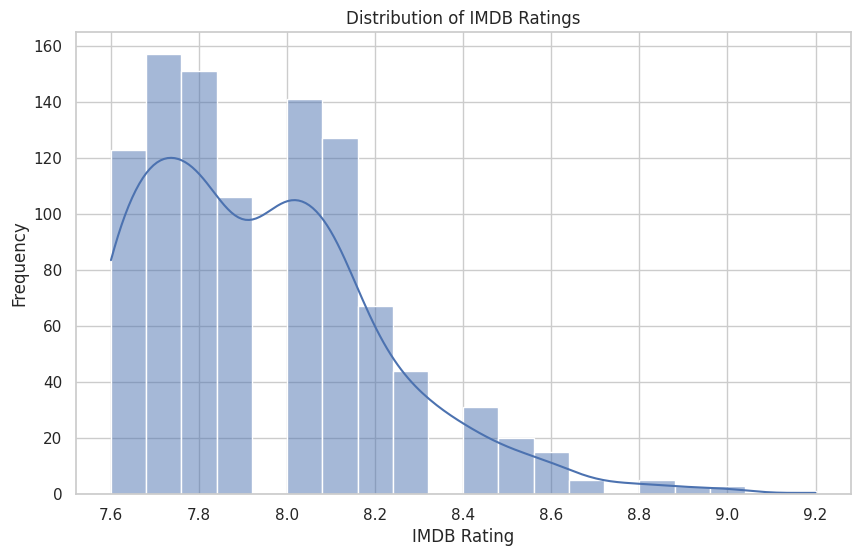

<ipython-input-165-67eb9dfab741>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


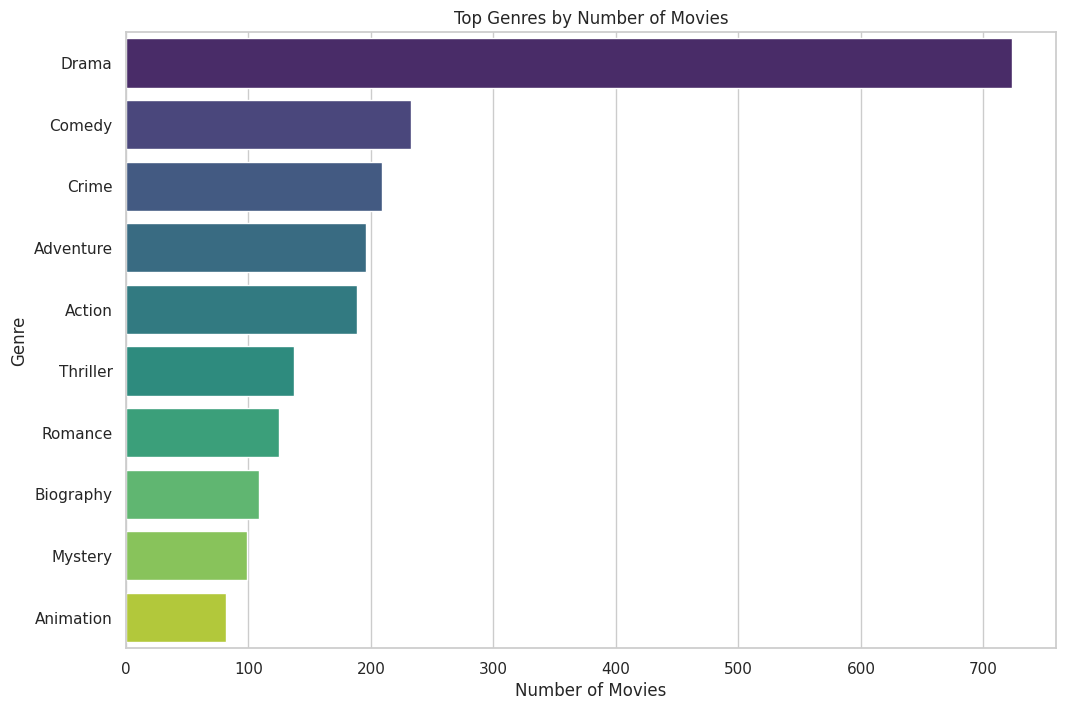

<ipython-input-165-67eb9dfab741>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genre_ratings.values, y=top_genre_ratings.index, palette="viridis")


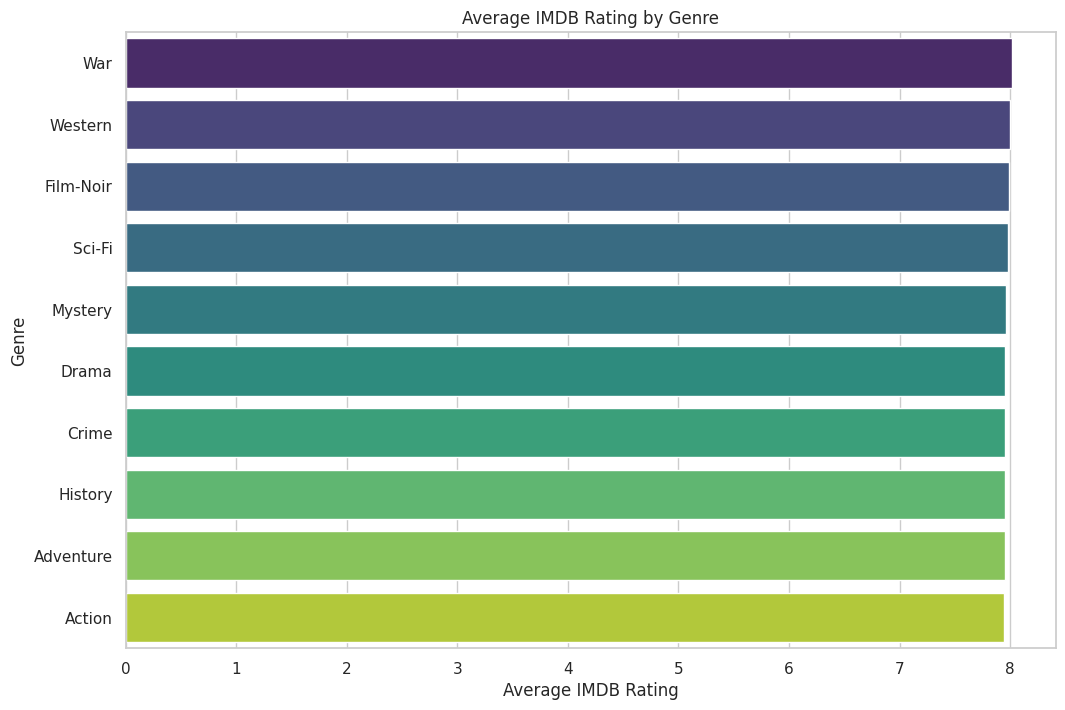

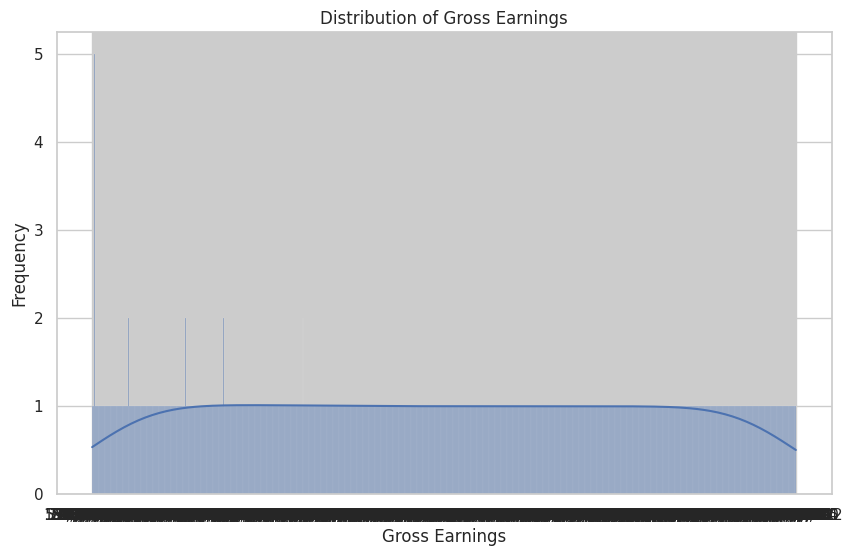

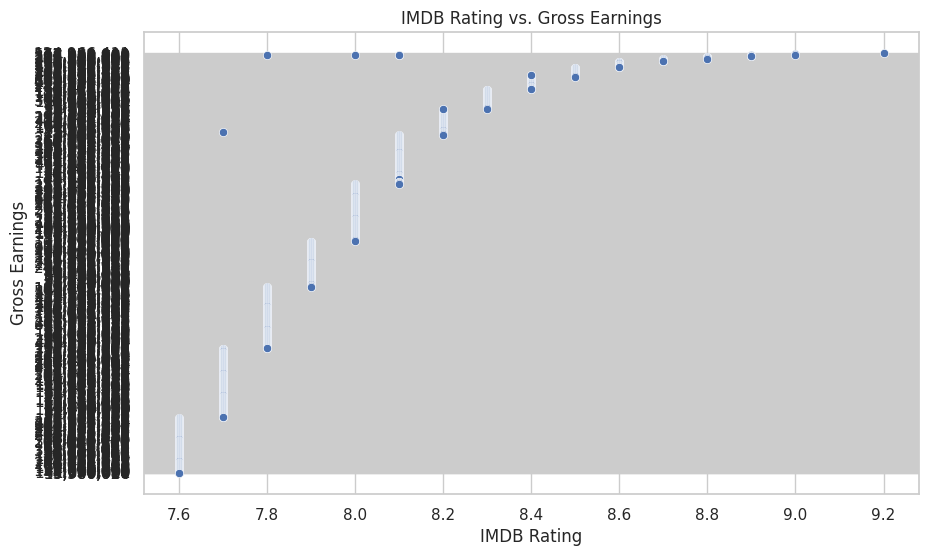

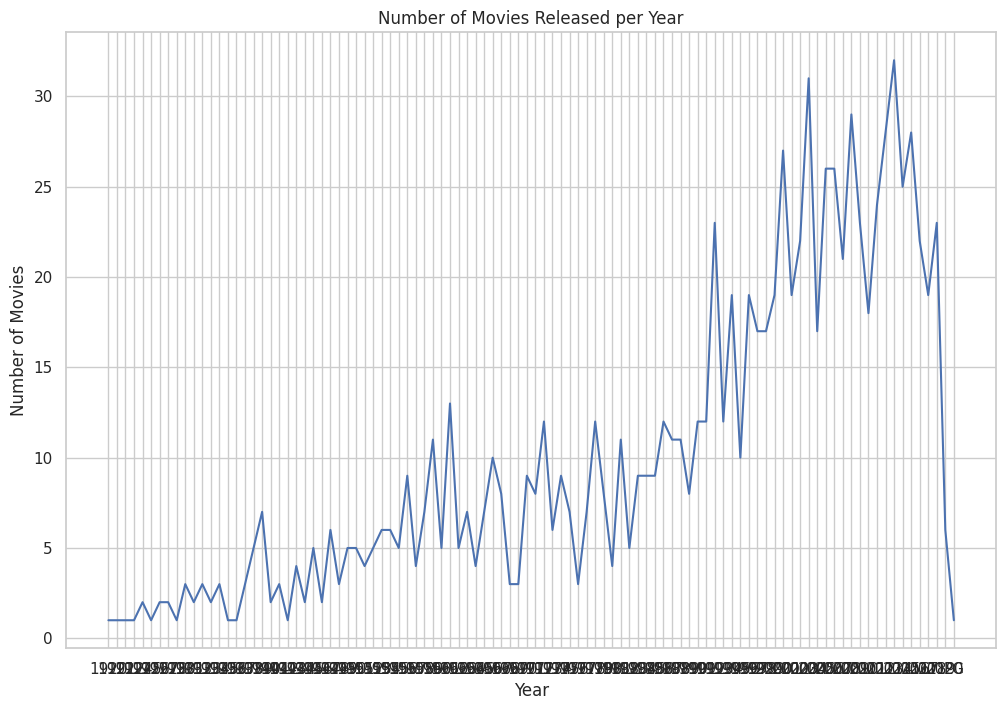

<ipython-input-165-67eb9dfab741>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="viridis")


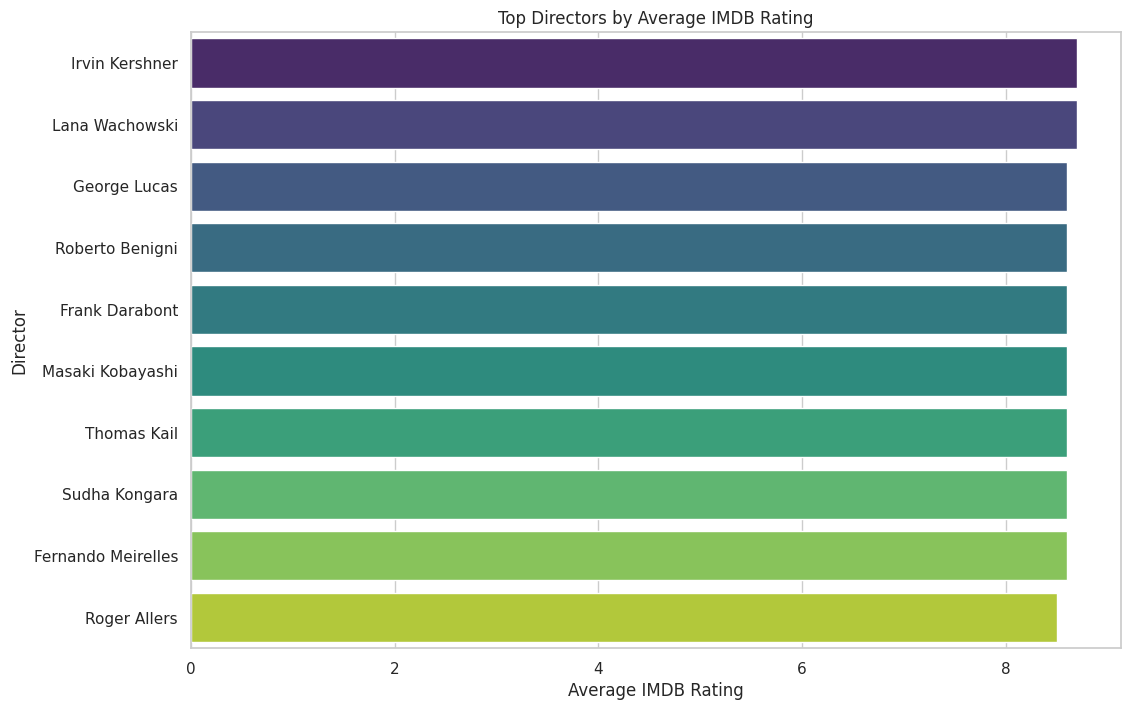

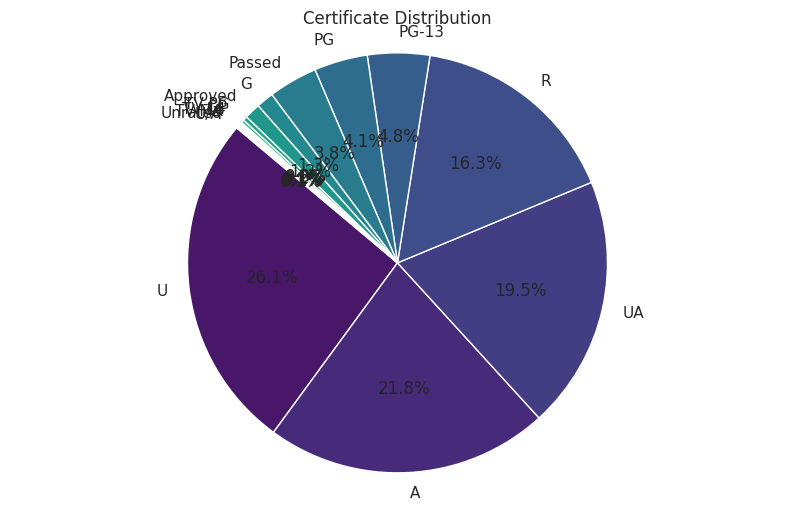

In [165]:
# Set up the visual style
sns.set(style="whitegrid")

# 1. Distribution of IMDB Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_original['IMDB_Rating'], kde=True, bins=20)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.show()

# 2. Top Genres by Number of Movies
plt.figure(figsize=(12, 8))
top_genres = df_original['Genre'].str.get_dummies(sep=', ').sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title('Top Genres by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

# 3. Average IMDB Rating by Genre
genre_ratings = df_original['Genre'].str.get_dummies(sep=', ').apply(lambda x: x * df_original['IMDB_Rating']).sum() / df_original['Genre'].str.get_dummies(sep=', ').sum()
top_genre_ratings = genre_ratings.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_genre_ratings.values, y=top_genre_ratings.index, palette="viridis")
plt.title('Average IMDB Rating by Genre')
plt.xlabel('Average IMDB Rating')
plt.ylabel('Genre')
plt.show()

# 4. Gross Earnings Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_original['Gross'].dropna(), kde=True, bins=20)
plt.title('Distribution of Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Frequency')
plt.show()

# 5. IMDB Rating vs. Gross Earnings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='Gross', data=df_original)
plt.title('IMDB Rating vs. Gross Earnings')
plt.xlabel('IMDB Rating')
plt.ylabel('Gross Earnings')
plt.show()

# 6. Number of Movies Released per Year
plt.figure(figsize=(12, 8))
movies_per_year = df_original.groupby('Released_Year').size()
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

# 7. Top Directors by Average IMDB Rating
top_directors = df_original.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="viridis")
plt.title('Top Directors by Average IMDB Rating')
plt.xlabel('Average IMDB Rating')
plt.ylabel('Director')
plt.show()

# 8. Certificate Distribution
plt.figure(figsize=(10, 6))
certificate_distribution = df_original['Certificate'].value_counts()
plt.pie(certificate_distribution, labels=certificate_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(certificate_distribution)))
plt.title('Certificate Distribution')
plt.axis('equal')
plt.show()

### Realizando limpeza dos dados

In [166]:
# Handle missing values
df_original['Certificate'].fillna('Unknown', inplace=True)

# Convert data types
df_original['Released_Year'] = pd.to_numeric(df_original['Released_Year'], errors='coerce') #converte valores vazios para N/A
df_original['Runtime'] = df_original['Runtime'].astype(str).str.replace(' min', '').astype(int)



#### Tratamento para os dados vazios na tebela Gross e Meta_score

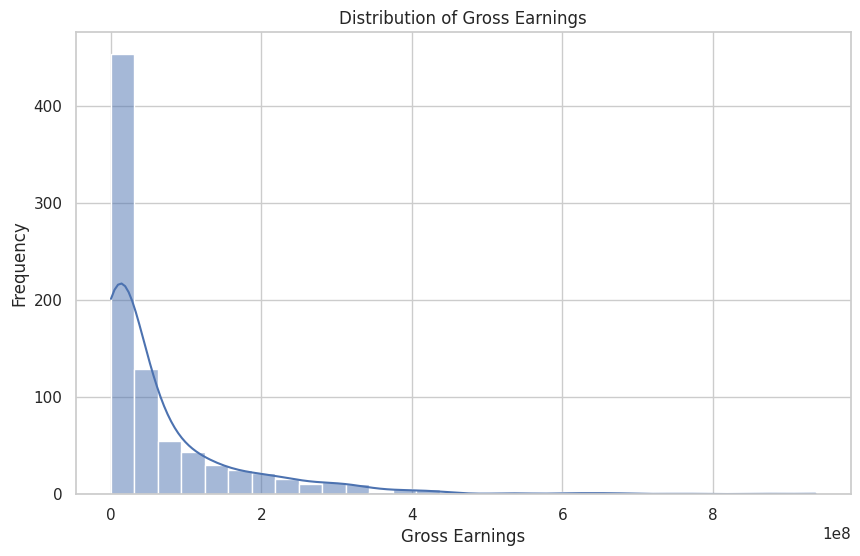

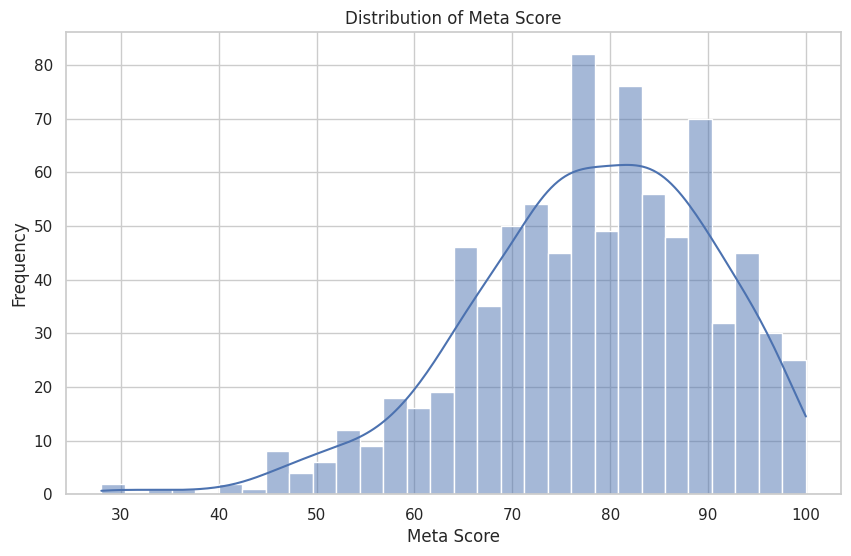

In [167]:
# Understand the Distribution

# Convert 'Gross' column to numeric
df_original['Gross'] = df_original['Gross'].astype(str).str.replace(',', '').astype(float)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_original['Gross'].dropna(), kde=True, bins=30)
plt.title('Distribution of Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_original['Meta_score'].dropna(), kde=True, bins=30)
plt.title('Distribution of Meta Score')
plt.xlabel('Meta Score')
plt.ylabel('Frequency')
plt.show()

In [168]:
# Compare Statistical Measures

mean_gross = df_original['Gross'].mean()
median_gross = df_original['Gross'].median()
mode_gross = df_original['Gross'].mode()[0]

mean_metaScore = df_original['Meta_score'].mean()
median_metaScore = df_original['Meta_score'].median()
mode_metaScore = df_original['Meta_score'].mode()[0]

# cria uma tabela com os resultados
data = {
    'Measure': ['Mean', 'Median', 'Mode'],
    'Gross': [mean_gross, median_gross, mode_gross],
    'Meta Score': [mean_metaScore, median_metaScore, mode_metaScore]
}

pd.DataFrame(data)




,Measure,Gross,Meta Score
0,Mean,6.808257e+07,77.969121
1,Median,2.345744e+07,79.000000
2,Mode,4.360000e+06,76.000000


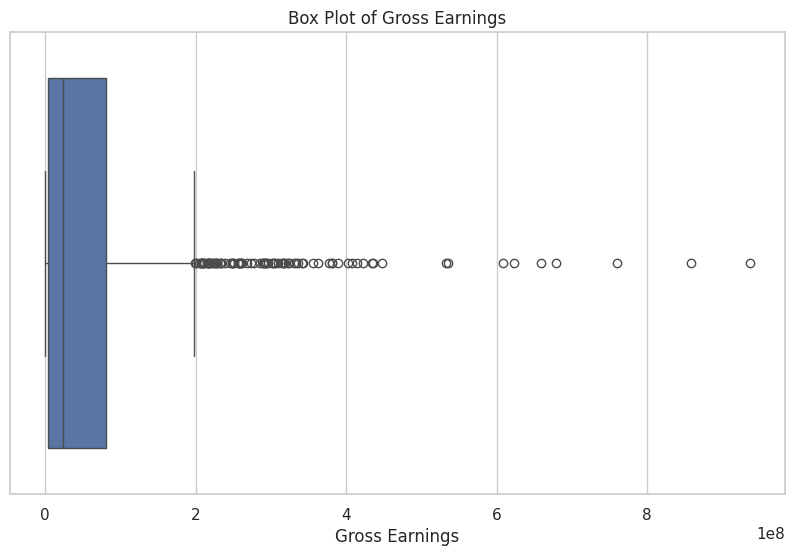

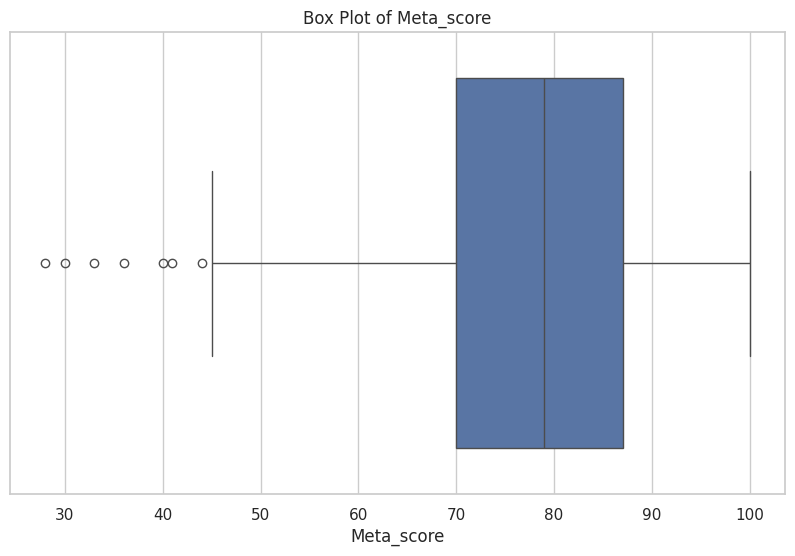

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
355,356,Tropa de Elite,2007.0,R,115,"Action, Crime, Drama",8.0,"In 1997 Rio de Janeiro, Captain Nascimento has...",33.0,José Padilha,Wagner Moura,André Ramiro,Caio Junqueira,Milhem Cortaz,98097,8060.0
647,648,The Boondock Saints,1999.0,R,108,"Action, Crime, Thriller",7.8,Two Irish Catholic brothers become vigilantes ...,44.0,Troy Duffy,Willem Dafoe,Sean Patrick Flanery,Norman Reedus,David Della Rocco,227143,25812.0
734,735,Kai po che!,2013.0,U,130,"Drama, Sport",7.7,Three friends growing up in India at the turn ...,40.0,Abhishek Kapoor,Amit Sadh,Sushant Singh Rajput,Rajkummar Rao,Amrita Puri,32628,1122527.0
787,788,I Am Sam,2001.0,PG-13,132,Drama,7.7,A mentally handicapped man fights for custody ...,28.0,Jessie Nelson,Sean Penn,Michelle Pfeiffer,Dakota Fanning,Dianne Wiest,142863,40311852.0
916,917,Seven Pounds,2008.0,UA,123,Drama,7.6,A man with a fateful secret embarks on an extr...,36.0,Gabriele Muccino,Will Smith,Rosario Dawson,Woody Harrelson,Michael Ealy,286770,69951824.0
941,942,The Butterfly Effect,2004.0,U,113,"Drama, Sci-Fi, Thriller",7.6,Evan Treborn suffers blackouts during signific...,30.0,Eric Bress,J. Mackye Gruber,Ashton Kutcher,Amy Smart,Melora Walters,451479,57938693.0
956,957,Fear and Loathing in Las Vegas,1998.0,R,118,"Adventure, Comedy, Drama",7.6,An oddball journalist and his psychopathic law...,41.0,Terry Gilliam,Johnny Depp,Benicio Del Toro,Tobey Maguire,Michael Lee Gogin,259753,10680275.0


In [169]:
# Visualizar outliers

# Box plot to visualize the distribution and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_original['Gross'])
plt.title('Box Plot of Gross Earnings')
plt.xlabel('Gross Earnings')
plt.show()

# Box plot to visualize the distribution and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_original['Meta_score'])
plt.title('Box Plot of Meta_score')
plt.xlabel('Meta_score')
plt.show()

# Identificando outliers
q1 = df_original['Meta_score'].quantile(0.25)
q3 = df_original['Meta_score'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df_original[(df_original['Meta_score'] < lower_bound) | (df_original['Meta_score'] > upper_bound)]

outliers



Não foi encontrado nos dados um motivo para notas baixas nos filmes listados

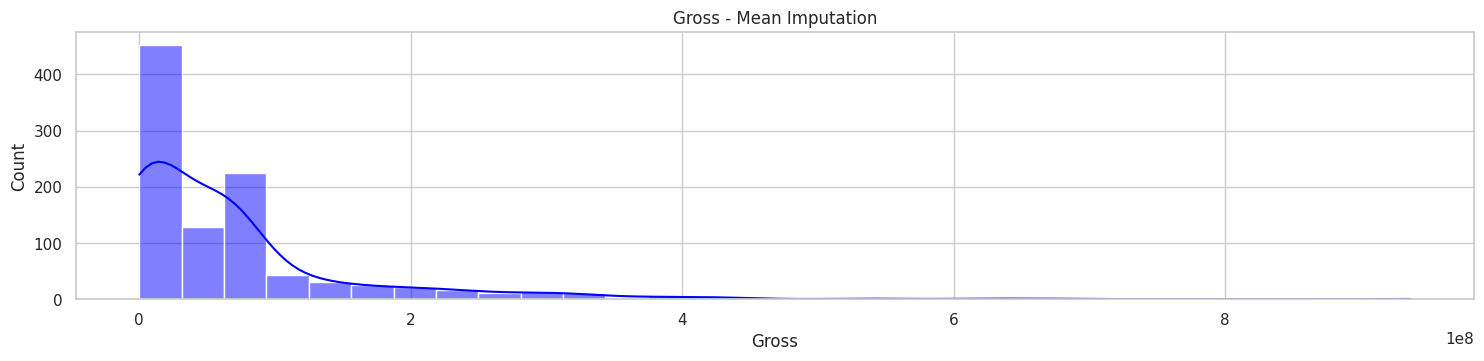

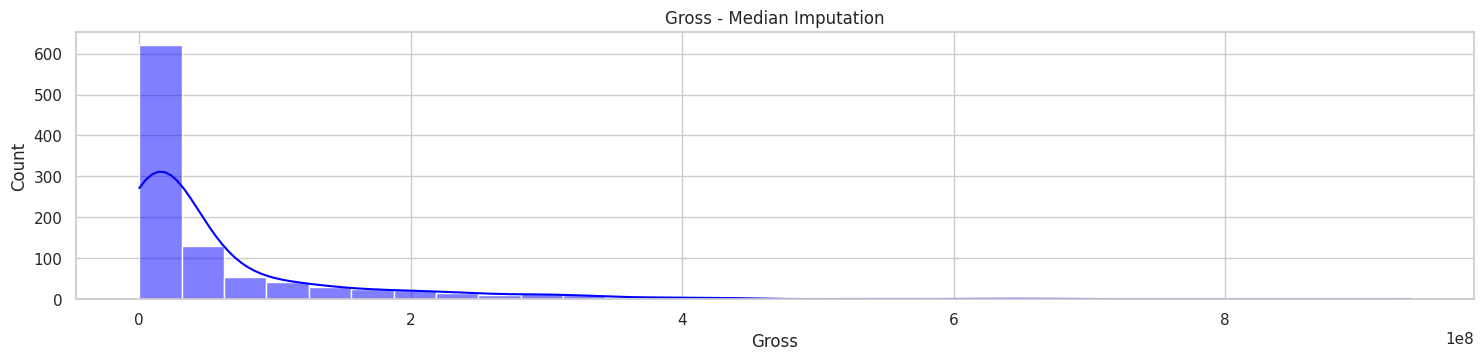

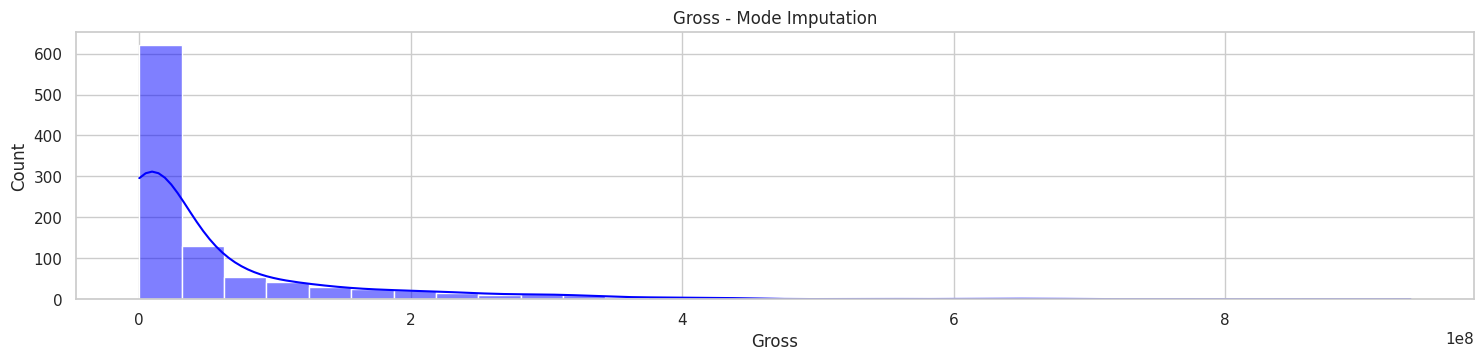

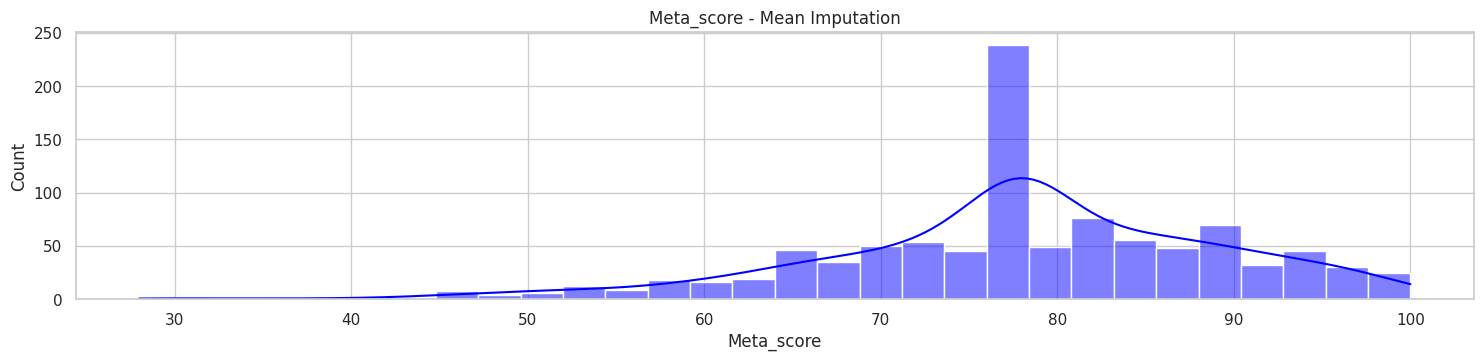

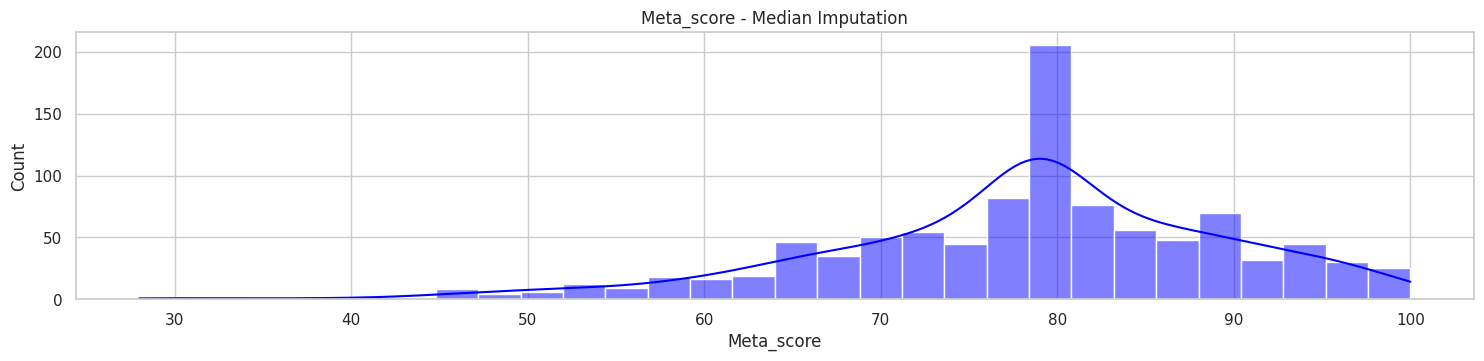

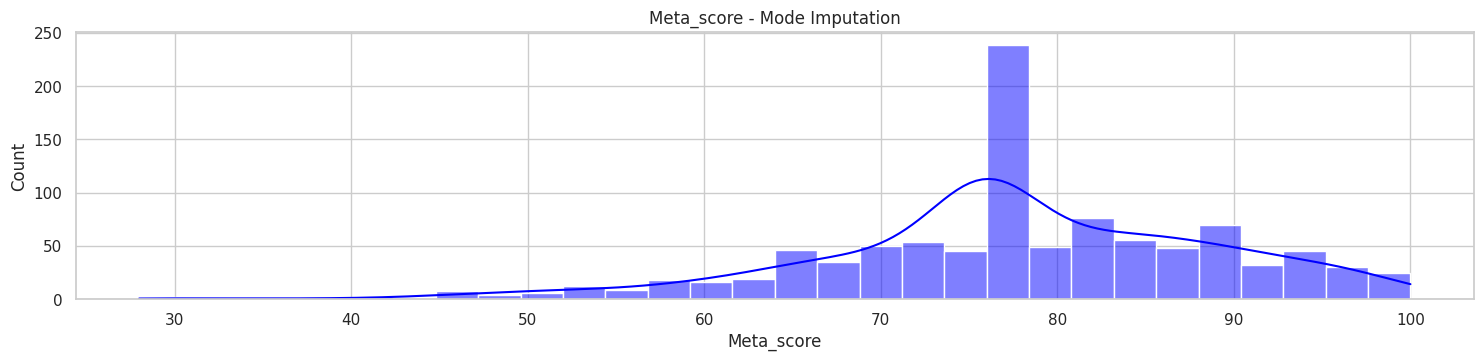

In [170]:
# Função para imputar valores ausentes e plotar histogramas
def impute_and_plot(df, column, strategy, value):
    df_imputed = df.copy()
    if strategy == 'mean':
        df_imputed[column].fillna(value, inplace=True)
    elif strategy == 'median':
        df_imputed[column].fillna(value, inplace=True)
    elif strategy == 'mode':
        df_imputed[column].fillna(value, inplace=True)

    plt.figure(figsize=(15, 10))
    plt.subplot(3, 1, 1)
    sns.histplot(df_imputed[column], kde=True, bins=30, color='blue')
    plt.title(f'{column} - {strategy.capitalize()} Imputation')

    plt.tight_layout()
    plt.show()

# Valores estatísticos
mean_gross = df_original['Gross'].mean()
median_gross = df_original['Gross'].median()
mode_gross = df_original['Gross'].mode()[0]

mean_metaScore = df_original['Meta_score'].mean()
median_metaScore = df_original['Meta_score'].median()
mode_metaScore = df_original['Meta_score'].mode()[0]

# Imputação e plotagem para Gross
for strategy, value in [('mean', mean_gross), ('median', median_gross), ('mode', mode_gross)]:
    impute_and_plot(df_original, 'Gross', strategy, value)

# Imputação e plotagem para Meta_score
for strategy, value in [('mean', mean_metaScore), ('median', median_metaScore), ('mode', mode_metaScore)]:
    impute_and_plot(df_original, 'Meta_score', strategy, value)

In [171]:
# analisando os resultados obtidos é possível notar que é possível utilizar a mediana para substituir os dados vazios

df_original['Meta_score'].fillna(df_original['Meta_score'].median(), inplace=True)

df_original['Gross'].fillna(df_original['Gross'].median(), inplace=True)

In [172]:
# verifica nulidade dos dados novamente

df_original.isnull().sum()

# verificando quem ficou vazio em release_year

df_original[df_original['Released_Year'].isnull()]


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,966,Apollo 13,NaN,U,140,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933.0


In [173]:
# Como é só um valor, busquei na internet a data correspondente e vou adicionar aos dados

df_original['Released_Year'] = df_original['Released_Year'].fillna(1995)

# verifica nulidade dos dados novamente
df_original.isnull().sum()

Unnamed: 0       0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

### Gráficos para variáveis unitárias

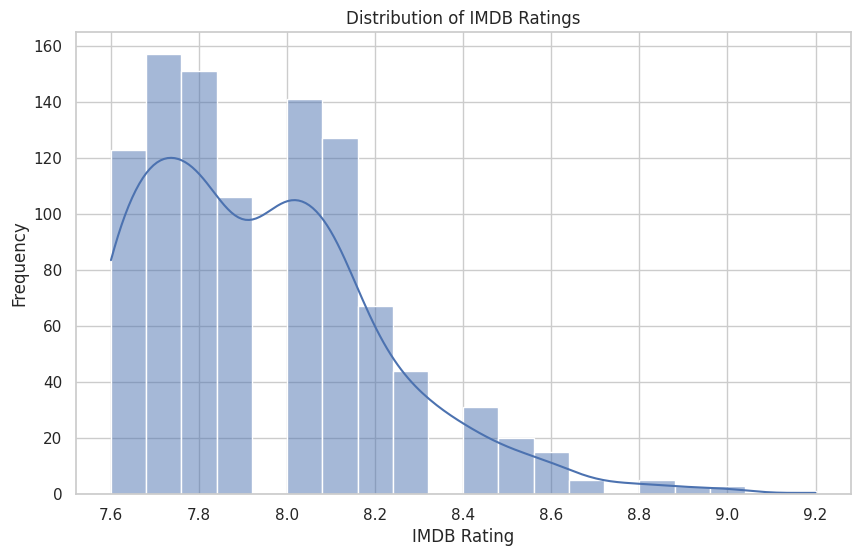

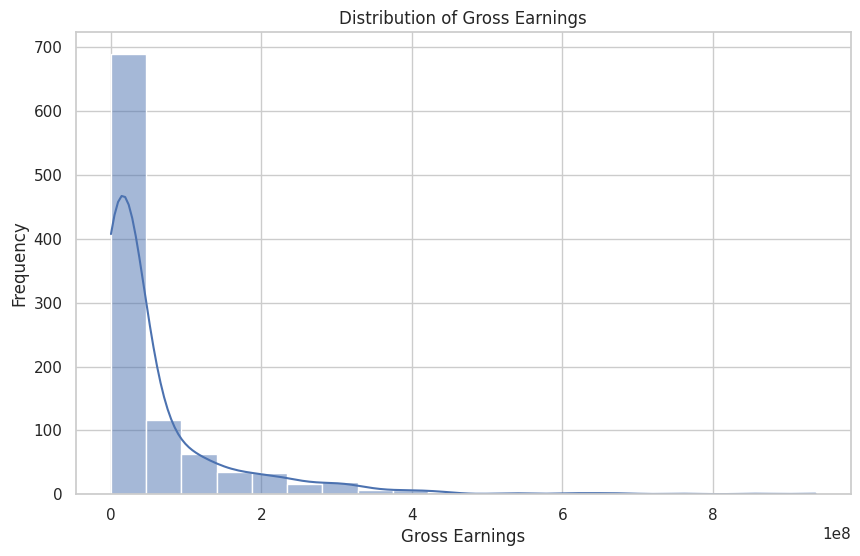

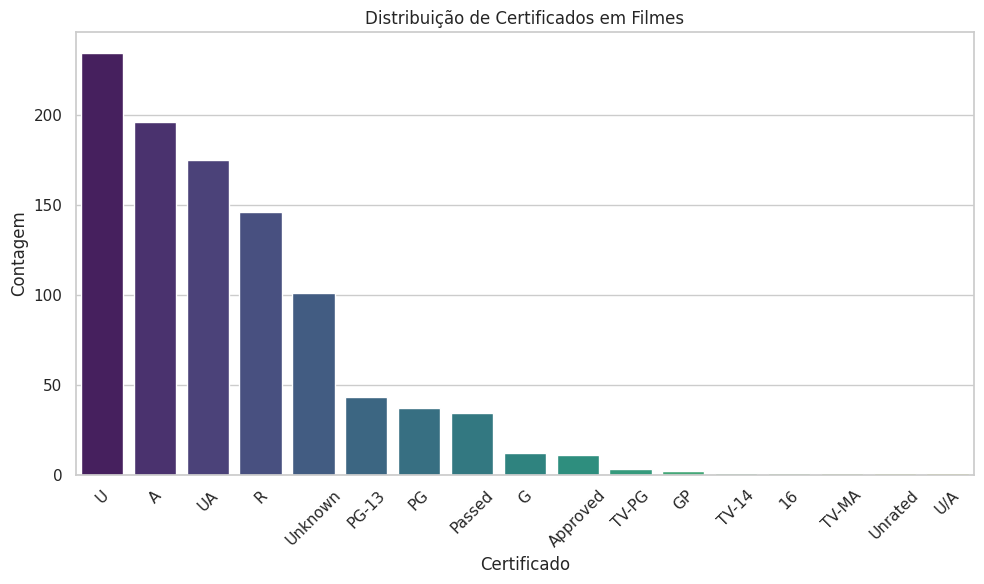

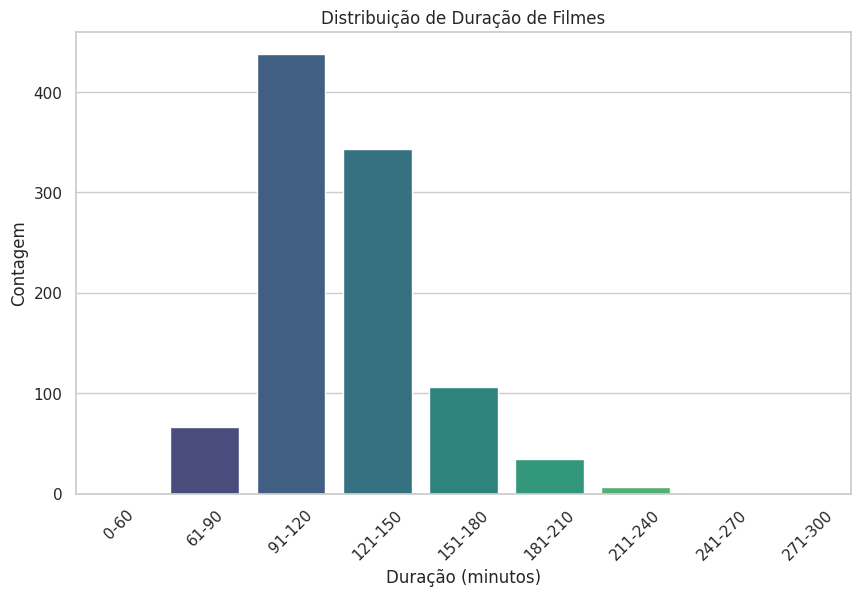

In [174]:
sns.set(style="whitegrid")

# IMDB Ratings

plt.figure(figsize=(10, 6))
sns.histplot(df_original['IMDB_Rating'], kde=True, bins=20)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.show()


# Gross
plt.figure(figsize=(10, 6))
sns.histplot(df_original['Gross'].dropna(), kde=True, bins=20)
plt.title('Distribution of Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Frequency')
plt.show()

# Certificate
certificate_counts = df_original['Certificate'].value_counts(dropna=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=certificate_counts.index, y=certificate_counts, palette='viridis', hue=certificate_counts.index, dodge=False, legend=False)
plt.title('Distribuição de Certificados em Filmes')
plt.xlabel('Certificado')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Criando faixas de duração de filmes
bins = [0, 60, 90, 120, 150, 180, 210, 240, 270, 300]
labels = ['0-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240', '241-270', '271-300']

# Adicionando uma nova coluna 'Runtime_Group' com base nas faixas de duração
df_original['Runtime_Group'] = pd.cut(df_original['Runtime'], bins=bins, labels=labels, right=False)

# Plotando o gráfico de contagem para as faixas de duração
plt.figure(figsize=(10, 6))
sns.countplot(data=df_original, x='Runtime_Group', palette='viridis', hue='Runtime_Group', legend=False, dodge=False)
plt.title('Distribuição de Duração de Filmes')
plt.xlabel('Duração (minutos)')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()

# Removendo a coluna 'Runtime_Group' após o uso, se necessário
df_original.drop(columns=['Runtime_Group'], inplace=True)


### Gráficos para variáveis correlacionadas

<ipython-input-175-ef1f69e60d0d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


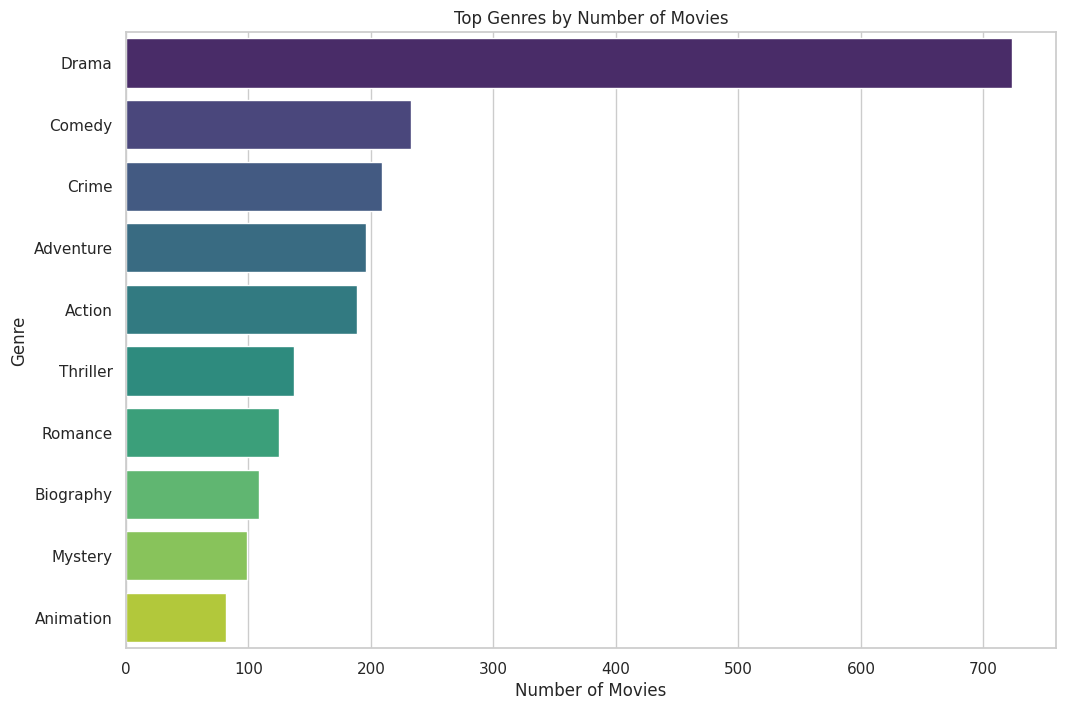

        Genre  Number of Movies  Average IMDB Rating
19      Sport                19             8.013725
20    Musical                17             8.000000
9   Animation                82             7.989474
16     Horror                32             7.977612
14        War                51             7.967677
6     Romance               125             7.957538
5    Thriller               137             7.954545
10     Sci-Fi                67             7.953571
1      Comedy               233             7.952041
0       Drama               723             7.948677


<ipython-input-175-ef1f69e60d0d>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genre_data['Average IMDB Rating'], y=top_genre_data['Genre'], palette='viridis') # Use the actual genre names for the y-axis


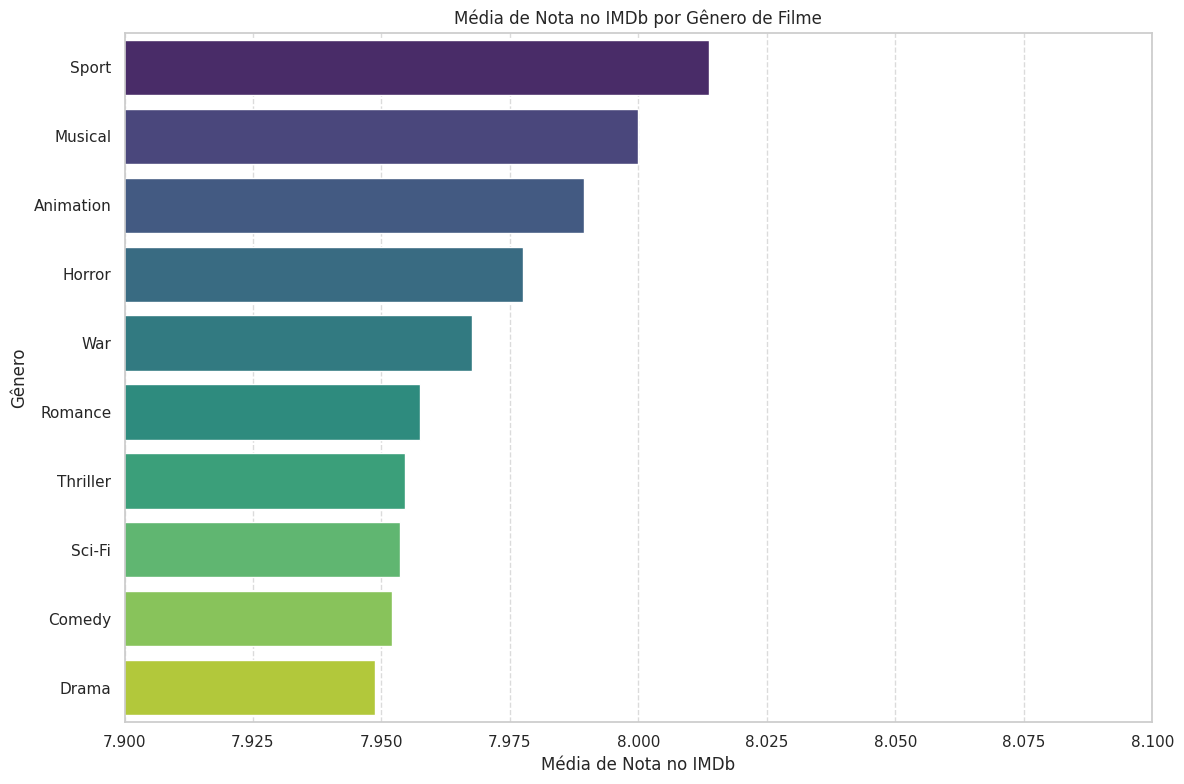

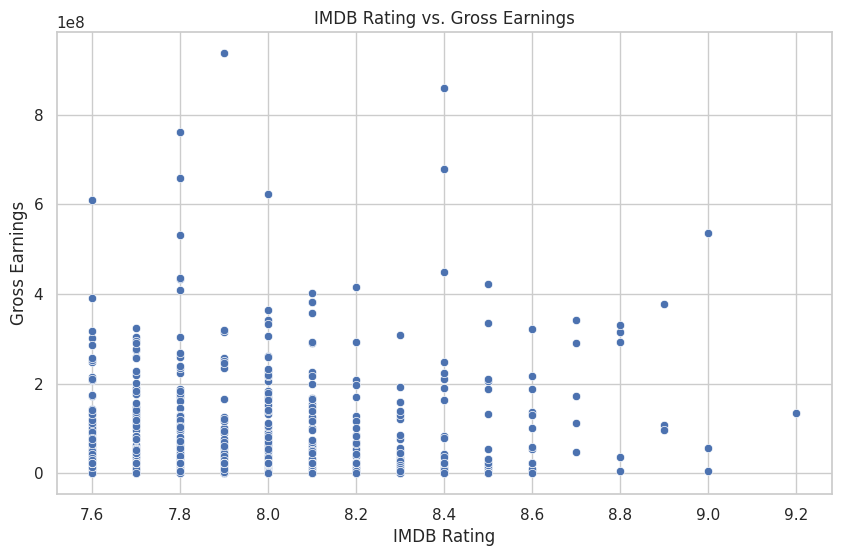

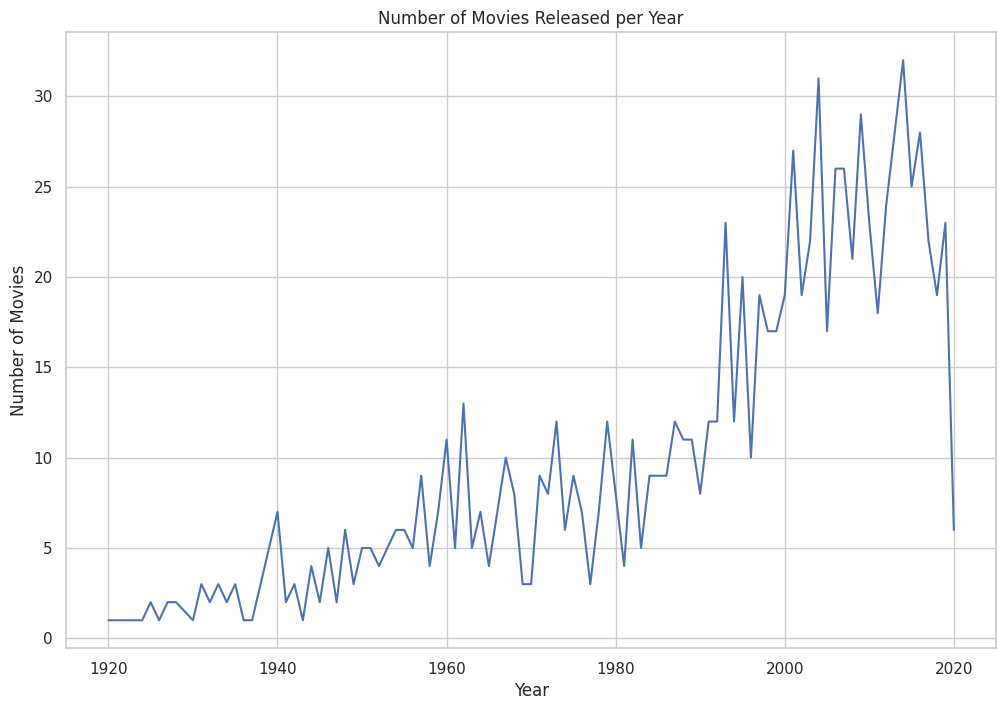

<ipython-input-175-ef1f69e60d0d>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="viridis")


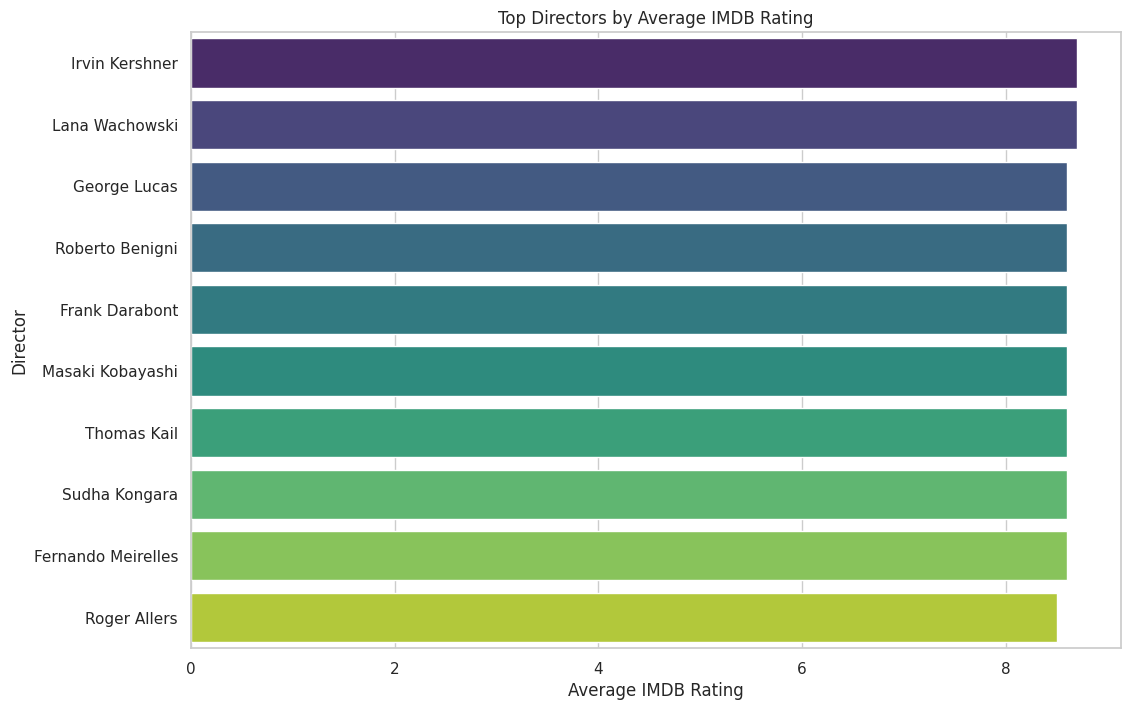

In [175]:
# Genres x Movies
plt.figure(figsize=(12, 8))
top_genres = df_original['Genre'].str.get_dummies(sep=', ').sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title('Top Genres by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


# IMDB Rating x Genre
genre_counts = df_original['Genre'].str.get_dummies(sep=', ').sum().sort_values(ascending=False)
genre_ratings = df_original['Genre'].str.get_dummies(sep=', ').apply(lambda x: x * df_original['IMDB_Rating']).sum() / df_original['Genre'].str.get_dummies(sep=', ').sum()
top_genre_ratings = genre_ratings.sort_values(ascending=False).head(10)

top_genre_data = pd.DataFrame({
    'Genre': genre_counts.index,
    'Number of Movies': genre_counts.values,
    'Average IMDB Rating': genre_ratings.values
}).sort_values(by='Average IMDB Rating', ascending=False).head(10)

# Display the data
print(top_genre_data)

# Criando o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=top_genre_data['Average IMDB Rating'], y=top_genre_data['Genre'], palette='viridis') # Use the actual genre names for the y-axis
plt.title('Média de Nota no IMDb por Gênero de Filme')
plt.xlabel('Média de Nota no IMDb')
plt.ylabel('Gênero')
plt.xlim(7.9, 8.1)  # Ajustando o limite do eixo x para melhor visualização
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Adicionando linhas de grade no eixo x
plt.tight_layout()
plt.show()


# IMDB Rating x Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='Gross', data=df_original)
plt.title('IMDB Rating vs. Gross Earnings')
plt.xlabel('IMDB Rating')
plt.ylabel('Gross Earnings')
plt.show()


# Movies x Year
plt.figure(figsize=(12, 8))
movies_per_year = df_original.groupby('Released_Year').size()
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

# Directors x IMDB Rating
top_directors = df_original.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="viridis")
plt.title('Top Directors by Average IMDB Rating')
plt.xlabel('Average IMDB Rating')
plt.ylabel('Director')
plt.show()

<ipython-input-176-98e23ff4cb95>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Combination', y='Average IMDb Rating', data=ratings_df, palette='viridis')


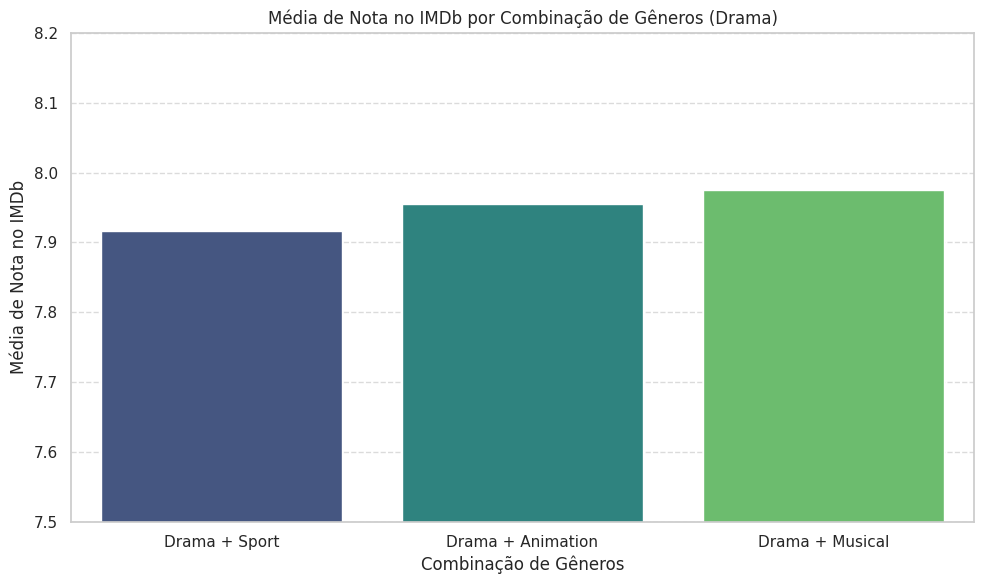

In [176]:


# Como o maior número de filmes é do genêro DRAMA vou juntar o genêro junto com os 3 genêros mais bem avaliados

# 1. Filtrar os filmes que são do gênero Drama
df_drama = df_original[df_original['Genre'].str.contains('Drama', case=False)]

# 2. Filtrar os filmes que são do gênero Drama e também de Sport, Animation, e Musical
df_drama_sport = df_original[df_original['Genre'].str.contains('Drama', case=False) & df_original['Genre'].str.contains('Sport', case=False)]
df_drama_animation = df_original[df_original['Genre'].str.contains('Drama', case=False) & df_original['Genre'].str.contains('Animation', case=False)]
df_drama_musical = df_original[df_original['Genre'].str.contains('Drama', case=False) & df_original['Genre'].str.contains('Musical', case=False)]

# 3. Calcular a média de notas (IMDb Rating) para cada combinação
mean_rating_drama_sport = df_drama_sport['IMDB_Rating'].mean()
mean_rating_drama_animation = df_drama_animation['IMDB_Rating'].mean()
mean_rating_drama_musical = df_drama_musical['IMDB_Rating'].mean()

# 4. Comparar as médias para determinar qual combinação tem a maior média de nota
ratings = {
    'Drama + Sport': mean_rating_drama_sport,
    'Drama + Animation': mean_rating_drama_animation,
    'Drama + Musical': mean_rating_drama_musical
}
# Criando um DataFrame a partir do dicionário para facilitar a plotagem
ratings_df = pd.DataFrame(list(ratings.items()), columns=['Combination', 'Average IMDb Rating'])

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Combination', y='Average IMDb Rating', data=ratings_df, palette='viridis')

# Ajustando o gráfico
plt.title('Média de Nota no IMDb por Combinação de Gêneros (Drama)')
plt.xlabel('Combinação de Gêneros')
plt.ylabel('Média de Nota no IMDb')
plt.ylim(7.5, 8.2)  # Ajustando o limite do eixo y para melhor visualização
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionando linhas de grade no eixo y

# Exibindo o gráfico
plt.tight_layout()
plt.show()

<ipython-input-177-8d3f94bb47d8>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='No_of_Votes', y='Series_Title', data=df_top_10_popular, palette='viridis')


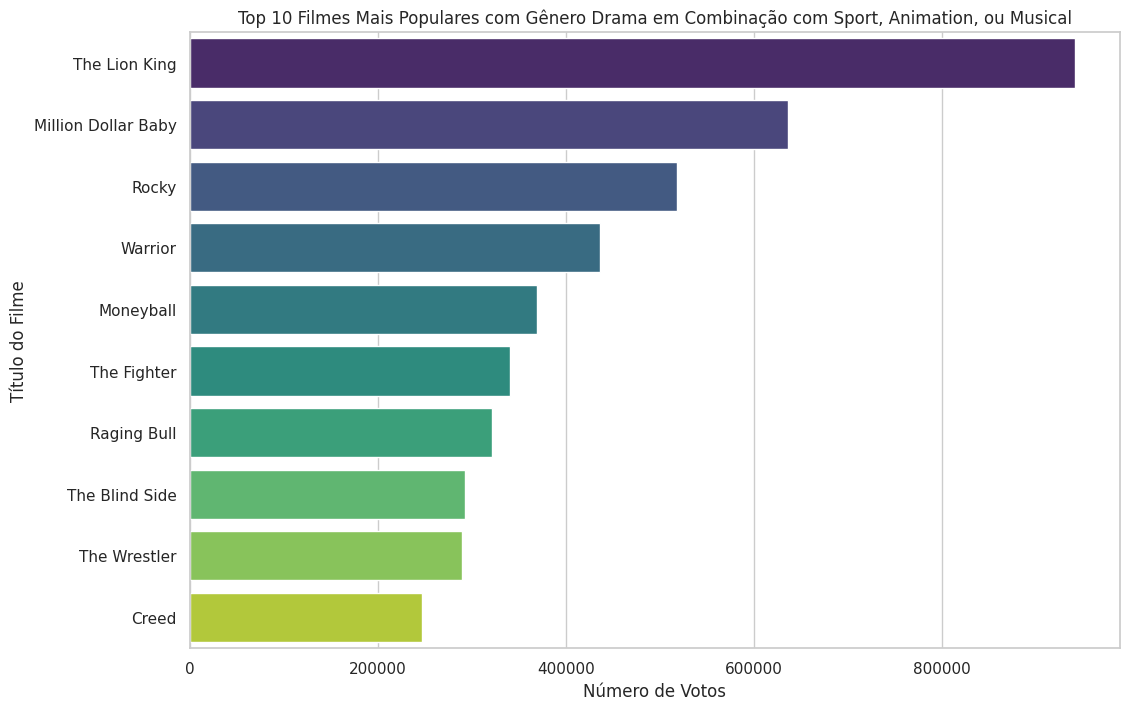

In [177]:
# Agora em posse dos filmes de maior nota nas categorias com as melhores avaliações gerais, vou fazer um ranking com os mais populares

# Filtrar os filmes que são do gênero Drama e também de Sport, Animation, e Musical
df_drama_sport = df_original[df_original['Genre'].str.contains('Drama', case=False) & df_original['Genre'].str.contains('Sport', case=False)]
df_drama_animation = df_original[df_original['Genre'].str.contains('Drama', case=False) & df_original['Genre'].str.contains('Animation', case=False)]
df_drama_musical = df_original[df_original['Genre'].str.contains('Drama', case=False) & df_original['Genre'].str.contains('Musical', case=False)]

# Combinar os DataFrames
df_combined = pd.concat([df_drama_sport, df_drama_animation, df_drama_musical])

# Remover duplicatas caso existam filmes que pertençam a mais de uma combinação de gêneros
df_combined = df_combined.drop_duplicates(subset='Series_Title')

# Ordenar por popularidade (número de votos) e selecionar os 10 mais populares
df_top_10_popular = df_combined.sort_values(by='No_of_Votes', ascending=False).head(10)

# Plotar os 10 filmes mais populares
plt.figure(figsize=(12, 8))
sns.barplot(x='No_of_Votes', y='Series_Title', data=df_top_10_popular, palette='viridis')

plt.xlabel('Número de Votos')
plt.ylabel('Título do Filme')
plt.title('Top 10 Filmes Mais Populares com Gênero Drama em Combinação com Sport, Animation, ou Musical')
plt.show()

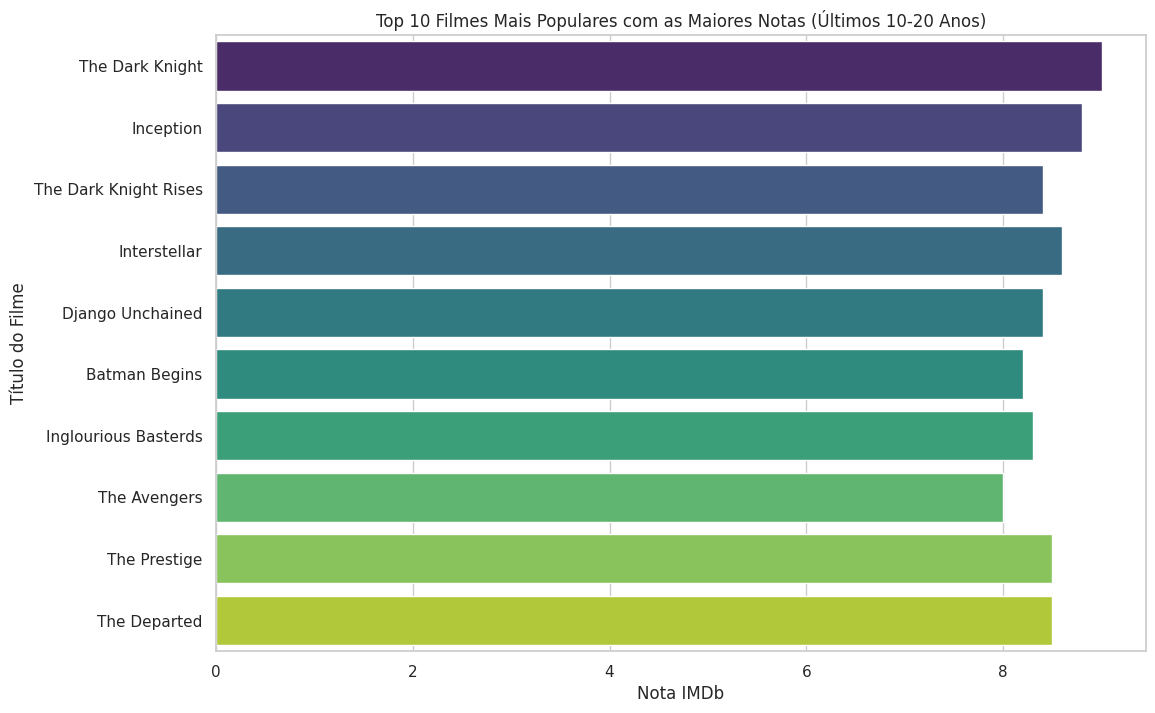

In [178]:
# em uma análise mais simples de indicar o que é mais popular e obteve a maior nota

# Filtrar os filmes lançados nos últimos 10-20 anos
df_recent = df_original[df_original['Released_Year'] >= 2004]

# Ordenar os filmes pelo número de votos (descendente) e pela nota do IMDb (descendente)
df_sorted = df_recent.sort_values(by=['No_of_Votes', 'IMDB_Rating'], ascending=[False, False])

# Selecionar os 10 filmes mais populares com as maiores notas
top_10_popular_highest_rated = df_sorted.head(10)

# Ordenar os dados para o gráfico de acordo com a popularidade (número de votos)
top_10_popular_highest_rated = top_10_popular_highest_rated.sort_values(by='No_of_Votes', ascending=False)

# Plotar os 10 filmes mais populares com as maiores notas
plt.figure(figsize=(12, 8))
sns.barplot(x='IMDB_Rating', y='Series_Title', data=top_10_popular_highest_rated, palette='viridis', hue='Series_Title', legend=False)

plt.xlabel('Nota IMDb')
plt.ylabel('Título do Filme')
plt.title('Top 10 Filmes Mais Populares com as Maiores Notas (Últimos 10-20 Anos)')
plt.show()



In [179]:
# Criei duas abordagens para recomendação do filme:
# Uma é a recomendação mais obvia de filmes atuais de maior popularidade e dentre eles o que possui a maior avaliação.
# A outra é encontrar o genêro mais recorrente e o que possuem maior nota, com isso buscar o mais popular e com maior nota

# RESULTADOS DAS RECOMENDAÇÕES:

# 1: THE DARK KNIGHT
# 2: THE LION KING

               Released_Year   Runtime  IMDB_Rating  Meta_score  No_of_Votes  \
Released_Year       1.000000  0.165831    -0.133355   -0.293899     0.246000   
Runtime             0.165831  1.000000     0.242751   -0.026479     0.172483   
IMDB_Rating        -0.133355  0.242751     1.000000    0.261010     0.479308   
Meta_score         -0.293899 -0.026479     0.261010    1.000000    -0.028558   
No_of_Votes         0.246000  0.172483     0.479308   -0.028558     1.000000   
Gross               0.232692  0.138628     0.088139   -0.051865     0.602705   

                  Gross  
Released_Year  0.232692  
Runtime        0.138628  
IMDB_Rating    0.088139  
Meta_score    -0.051865  
No_of_Votes    0.602705  
Gross          1.000000  


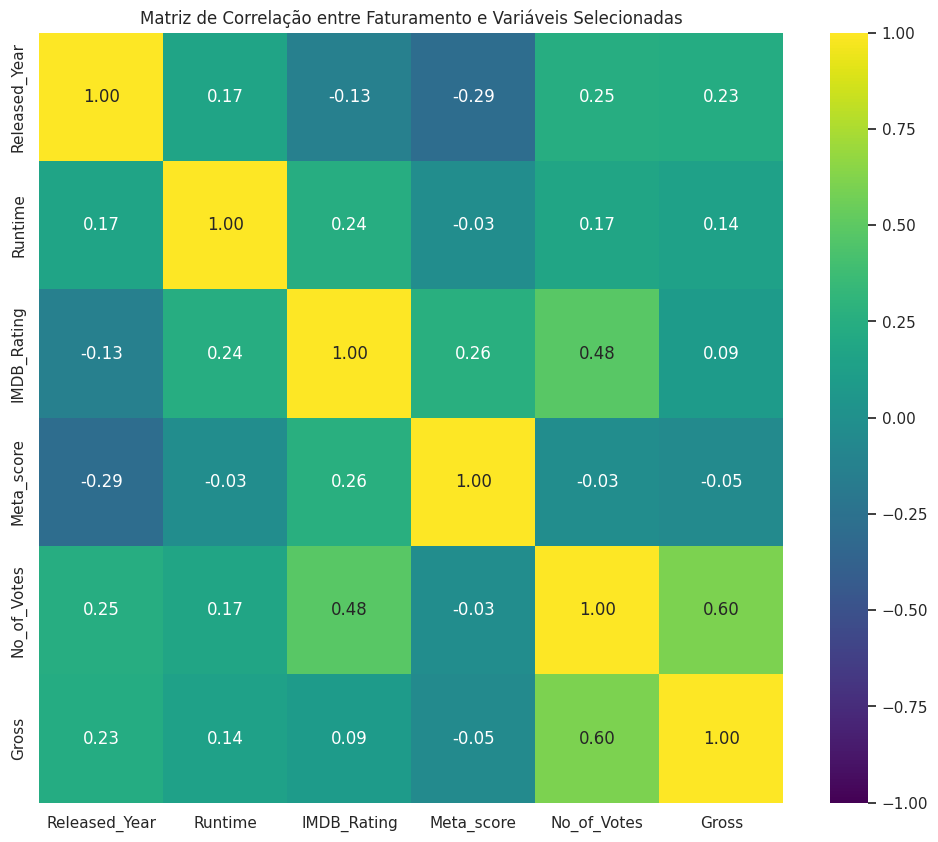

In [180]:
# para entender o que impacta o faturamento de um filme vamos plotar uma matrix de correlação entre algumas variáveis
# que considero importantes e que podem ter alguma relevancia

# Selecionar as variáveis de interesse para a matriz de correlação
vars_of_interest = ['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score',
                    'No_of_Votes', 'Gross']

# Calcular a matriz de correlação
corr_matrix = df_original[vars_of_interest].corr()

print(corr_matrix)

# Plotar a matriz de correlação usando um heatmap do seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre Faturamento e Variáveis Selecionadas')
plt.show()


In [181]:
# Selecionar os top 10 filmes com maior faturamento
top_10_grossing = df_original.sort_values(by='Gross', ascending=False).head(10)

# Criar um novo DataFrame com todas as colunas do original para os top 10 filmes com maior faturamento
df_top_10_grossing = df_original[df_original.index.isin(top_10_grossing.index)].copy()

# Exibir o DataFrame com todas as colunas do original para os top 10 filmes com maior faturamento
df_top_10_grossing


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,2,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
58,59,Avengers: Endgame,2019.0,UA,181,"Action, Adventure, Drama",8.4,After the devastating events of Avengers: Infi...,78.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Evans,Mark Ruffalo,809955,858373000.0
59,60,Avengers: Infinity War,2018.0,UA,149,"Action, Adventure, Sci-Fi",8.4,The Avengers and their allies must be willing ...,68.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482.0
62,63,The Dark Knight Rises,2012.0,UA,164,"Action, Adventure",8.4,Eight years after the Joker's reign of anarchy...,78.0,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,1516346,448139099.0
356,357,The Avengers,2012.0,UA,143,"Action, Adventure, Sci-Fi",8.0,Earth's mightiest heroes must come together an...,69.0,Joss Whedon,Robert Downey Jr.,Chris Evans,Scarlett Johansson,Jeremy Renner,1260806,623279547.0
476,477,Star Wars: Episode VII - The Force Awakens,2015.0,U,138,"Action, Adventure, Sci-Fi",7.9,"As a new threat to the galaxy rises, Rey, a de...",80.0,J.J. Abrams,Daisy Ridley,John Boyega,Oscar Isaac,Domhnall Gleeson,860823,936662225.0
581,582,Rogue One,2016.0,UA,133,"Action, Adventure, Sci-Fi",7.8,The daughter of an Imperial scientist joins th...,65.0,Gareth Edwards,Felicity Jones,Diego Luna,Alan Tudyk,Donnie Yen,556608,532177324.0
622,623,Avatar,2009.0,UA,162,"Action, Adventure, Fantasy",7.8,A paraplegic Marine dispatched to the moon Pan...,83.0,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,1118998,760507625.0
651,652,Titanic,1997.0,UA,194,"Drama, Romance",7.8,A seventeen-year-old aristocrat falls in love ...,75.0,James Cameron,Leonardo DiCaprio,Kate Winslet,Billy Zane,Kathy Bates,1046089,659325379.0
890,891,Incredibles 2,2018.0,UA,118,"Animation, Action, Adventure",7.6,The Incredibles family takes on a new mission ...,80.0,Brad Bird,Craig T. Nelson,Holly Hunter,Sarah Vowell,Huck Milner,250057,608581744.0


In [182]:
# Calcular a média de faturamento para cada tipo de certificado
media_faturamento_por_certificado = df_original.groupby('Certificate')['Gross'].mean().sort_values(ascending=False)

# Imprimir os resultados
print("Média de faturamento por tipo de certificado:")
print(media_faturamento_por_certificado)


Média de faturamento por tipo de certificado:
Certificate
UA          1.237616e+08
U           7.797807e+07
A           6.056183e+07
G           4.523984e+07
PG-13       3.569293e+07
U/A         2.602096e+07
R           2.561759e+07
TV-14       2.345744e+07
TV-MA       2.345744e+07
16          2.345744e+07
PG          1.984501e+07
TV-PG       1.567385e+07
Approved    1.445284e+07
Unknown     1.443866e+07
Passed      1.126616e+07
GP          7.089580e+05
Unrated     3.000000e+05
Name: Gross, dtype: float64


# Criação do modelo de predição para notas do IMDB

In [183]:

# Selecionar as features e o alvo
features = ['Released_Year', 'Certificate', 'Genre', 'Meta_score', 'Director', 'Runtime', 'No_of_Votes', 'Gross']
target = 'IMDB_Rating'

# Criar um novo DataFrame com as features selecionadas
df_model = df_original[features + [target]].copy()

# Converter variáveis categóricas em numéricas
label_encoders = {}
for column in ['Certificate', 'Genre', 'Director']:
    label_encoders[column] = LabelEncoder()
    df_model[column] = label_encoders[column].fit_transform(df_model[column].astype(str))

# Tratar a variável Runtime (extrair apenas os números)
def convert_runtime(runtime):
    if isinstance(runtime, str):
        return int(runtime.split()[0])
    return runtime

df_model['Runtime'] = df_model['Runtime'].apply(convert_runtime)

# Tratar a variável Gross (remover vírgulas e converter para float)
df_model['Gross'] = df_model['Gross'].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

# Dividir os dados em treino e teste
X = df_model.drop(columns=[target])
y = df_model[target]

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aumentar a complexidade do modelo MLPRegressor e ajustar hiperparâmetros
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='tanh', solver='adam', alpha=0.2, learning_rate='adaptive', max_iter=2000, random_state=42)
mlp_model.fit(X_scaled, y)

# Avaliar o modelo no conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
y_pred = mlp_model.predict(X_test)

# Calcular métricas de desempenho
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")

# Exemplo de previsão para um novo filme
input_data = {
    'Released_Year': 1994,
    'Certificate': 'A',
    'Genre': 'Drama',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Runtime': '142 min',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

# Transformar os dados de entrada para o formato esperado pelo modelo
input_df = pd.DataFrame([input_data])
for column in ['Certificate', 'Genre', 'Director']:
    input_df[column] = label_encoders[column].transform(input_df[column].astype(str))

# Tratar a variável Runtime (extrair apenas os números)
input_df['Runtime'] = input_df['Runtime'].apply(convert_runtime)

# Tratar a variável Gross (remover vírgulas e converter para float)
input_df['Gross'] = input_df['Gross'].apply(lambda x: float(x.replace(',', '')))

# Normalizar os dados de entrada
input_scaled = scaler.transform(input_df)

# Prever a nota do IMDb para o novo filme
predicted_rating = mlp_model.predict(input_scaled)[0]

# Garantir que a previsão está dentro dos limites esperados
predicted_rating = np.clip(predicted_rating, 0, 10)
print(f"Previsão da nota do IMDb para o novo filme: {predicted_rating}")


RMSE: 0.21298430166935275
R²: 0.308964829114895
Previsão da nota do IMDb para o novo filme: 8.97801392847133


In [184]:
# Selecionar as features e o alvo
features = ['Released_Year', 'Certificate', 'Genre', 'Meta_score', 'Director', 'Runtime', 'No_of_Votes', 'Gross']
target = 'IMDB_Rating'

# Criar um novo DataFrame com as features selecionadas
df_model = df_original[features + [target]].copy()

# Converter variáveis categóricas em numéricas
label_encoders = {}
for column in ['Certificate', 'Genre', 'Director']:
    label_encoders[column] = LabelEncoder()
    df_model[column] = label_encoders[column].fit_transform(df_model[column].astype(str))

# Tratar a variável Runtime (extrair apenas os números)
def convert_runtime(runtime):
    if isinstance(runtime, str):
        return int(runtime.split()[0])
    return runtime

df_model['Runtime'] = df_model['Runtime'].apply(convert_runtime)

# Tratar a variável Gross (remover vírgulas e converter para float)
df_model['Gross'] = df_model['Gross'].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

# Dividir os dados em treino e teste
X = df_model.drop(columns=[target])
y = df_model[target]

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aumentar a complexidade do modelo MLPRegressor e ajustar hiperparâmetros
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='tanh', solver='adam', alpha=0.2, learning_rate='adaptive', max_iter=2000, random_state=42)
mlp_model.fit(X_scaled, y)

# Salvar o modelo usando pickle
with open('imdb_rating_model.pkl', 'wb') as f:
    pickle.dump((mlp_model, scaler, label_encoders), f)


In [185]:
# Carregar o modelo salvo
with open('imdb_rating_model.pkl', 'rb') as f:
    mlp_model, scaler, label_encoders = pickle.load(f)

# Objeto com os dados do filme a ser analisado
input_data = {
    'Released_Year': 1994,
    'Certificate': 'A',
    'Genre': 'Drama',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Runtime': '142 min',
    'No_of_Votes': 2343110,
    'Gross': '28,341,469'
}

# Transformar os dados de entrada para o formato esperado pelo modelo
input_df = pd.DataFrame([input_data])
for column in ['Certificate', 'Genre', 'Director']:
    input_df[column] = label_encoders[column].transform(input_df[column].astype(str))

# Tratar a variável Runtime (extrair apenas os números)
input_df['Runtime'] = input_df['Runtime'].apply(convert_runtime)

# Tratar a variável Gross (remover vírgulas e converter para float)
input_df['Gross'] = input_df['Gross'].apply(lambda x: float(x.replace(',', '')))

# Normalizar os dados de entrada
input_scaled = scaler.transform(input_df)

# Prever a nota do IMDb para o novo filme
predicted_rating = mlp_model.predict(input_scaled)[0]

# Garantir que a previsão está dentro dos limites esperados 0 - 10
predicted_rating = np.clip(predicted_rating, 0, 10)
print(f"Previsão da nota do IMDb para o filme: {predicted_rating}")


Previsão da nota do IMDb para o filme: 8.97801392847133
